loading annotations into memory...
Done (t=1.26s)
creating index...
index created!


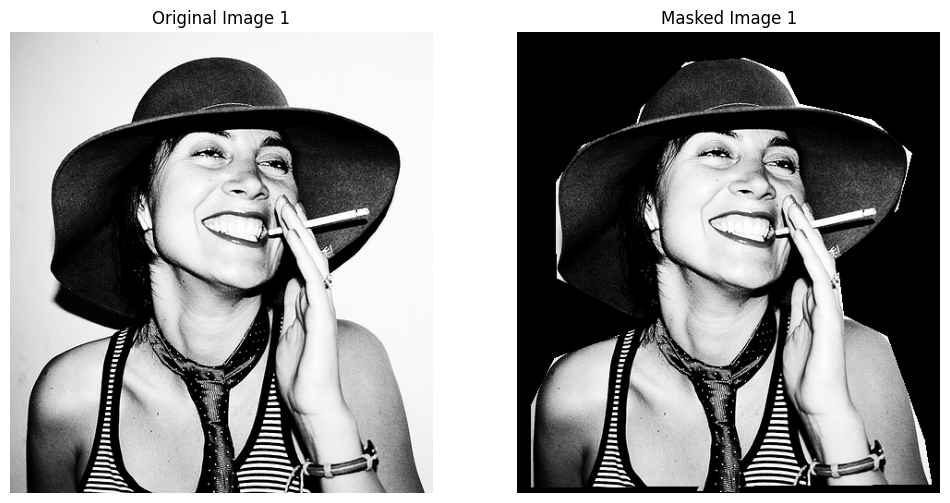

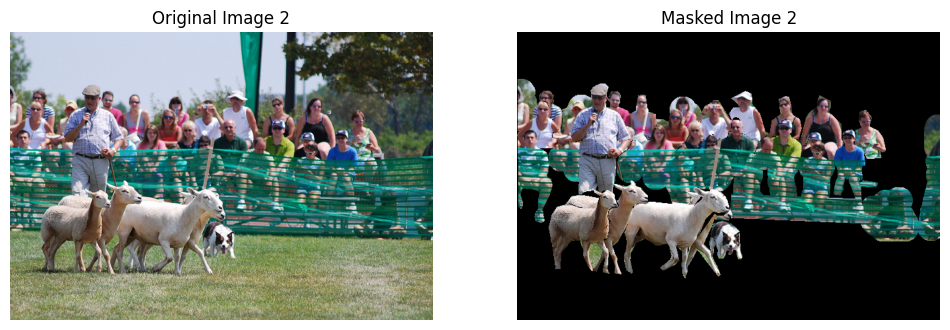

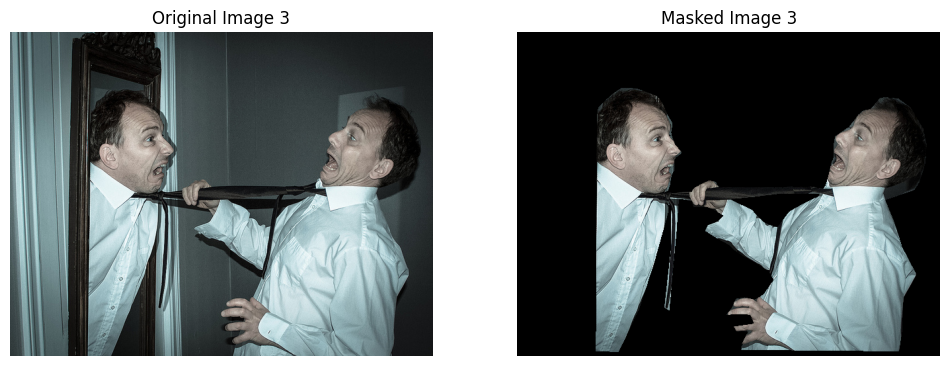

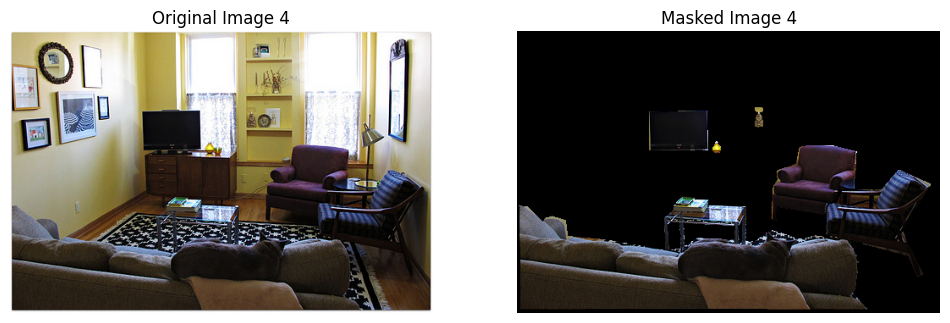

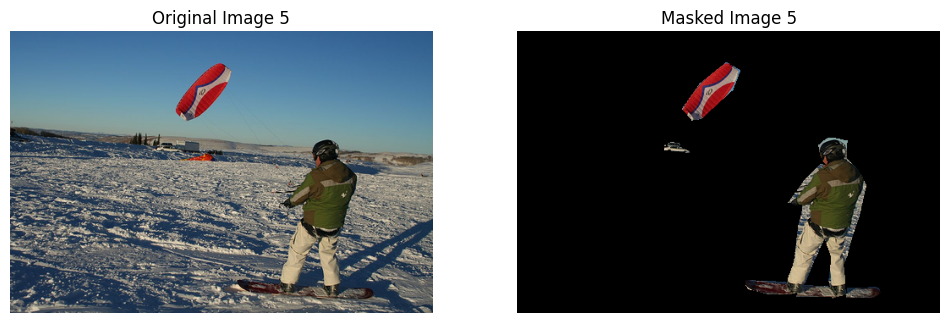

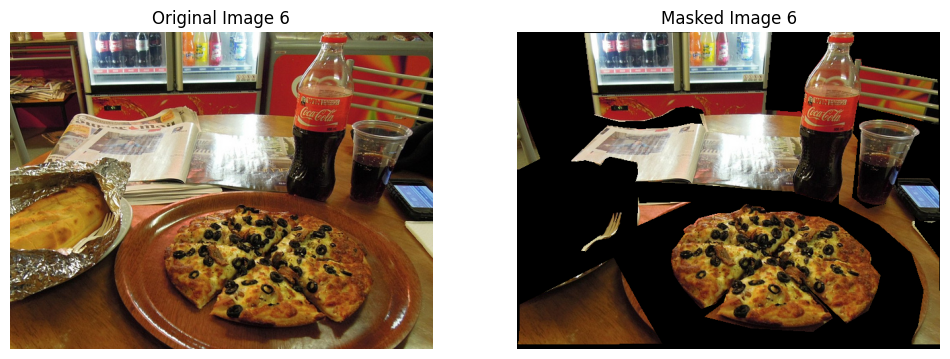

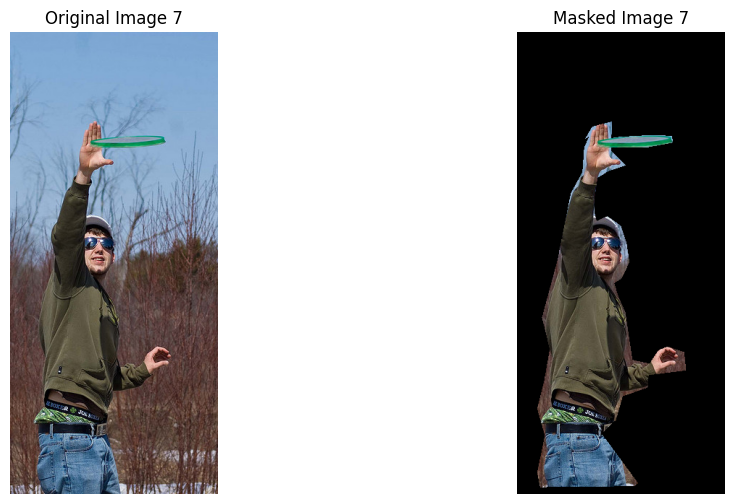

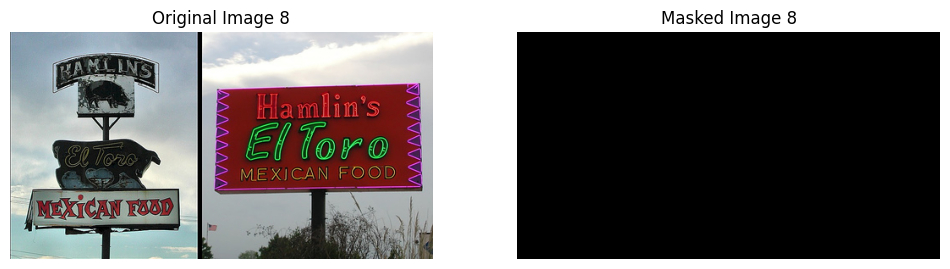

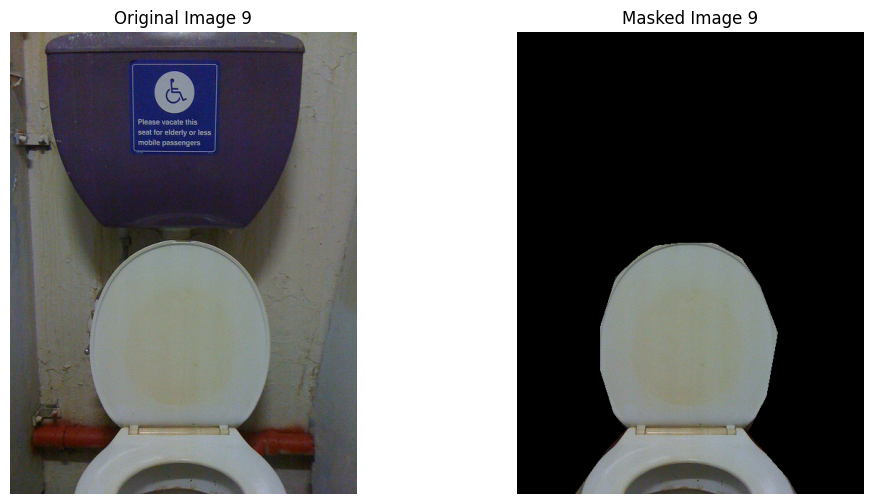

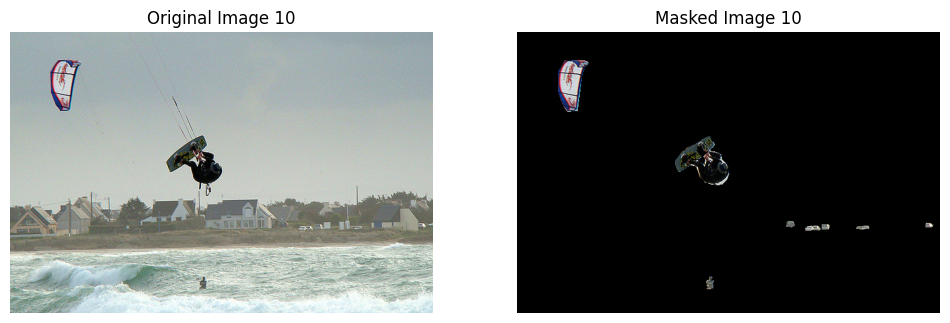

In [1]:
import os, random, numpy as np, matplotlib.pyplot as plt, cv2
from pycocotools.coco import COCO

# Paths (update these if needed)
imgDir  = r"C:\Users\KIIT0001\Desktop\infosys aiml\val2017\val2017"
annFile = r"C:\Users\KIIT0001\Desktop\infosys aiml\annotations_trainval2017\annotations\instances_val2017.json"

# Load COCO
coco = COCO(annFile)

# Get all image IDs
imgIds = coco.getImgIds()
random.shuffle(imgIds)

# Select 10 random images
sample_imgIds = imgIds[:10]

# Loop through and display
for idx, imgId in enumerate(sample_imgIds, 1):
    imgInfo = coco.loadImgs(imgId)[0]

    # Load image
    imgPath = os.path.join(imgDir, imgInfo['file_name'])
    image = cv2.cvtColor(cv2.imread(imgPath), cv2.COLOR_BGR2RGB)

    # Load annotations
    annIds = coco.getAnnIds(imgIds=imgInfo['id'])
    anns = coco.loadAnns(annIds)

    # Build a combined mask for all objects
    mask = np.zeros((imgInfo['height'], imgInfo['width']), dtype=np.uint8)
    for ann in anns:
        mask |= coco.annToMask(ann).astype(np.uint8)

    # Apply mask → keep objects, black out background
    masked_image = image.copy()
    masked_image[mask == 0] = 0

    # Plot side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title(f"Original Image {idx}")
    ax[0].axis("off")

    ax[1].imshow(masked_image)
    ax[1].set_title(f"Masked Image {idx}")
    ax[1].axis("off")

    plt.show()
